In [1]:
import pandas as pd
import pickle as pk
from loans import LoanData, PredictionPipeline

In [3]:
# Load and clean the data
data_full = LoanData('../../data/data.csv')

FILLING IN MISSING DATA AS FOLLOWS:
Missing data in ApplicantIncome replaced with 3812.5
Missing data in CoapplicantIncome replaced with 1188.5
Missing data in LoanAmount replaced with 128.0
Missing data in LoanAmountTerm replaced with 360.0
Missing data in Dependents replaced with 0
Missing data in SelfEmployed replaced with No
Missing data in CreditHistory replaced with 0
Missing data in Gender replaced with Unknown
Missing data in Married replaced with Unknown

REMOVING OUTLIERS:
Initial range of ApplicantIncome: 150.0 - 81000.0
Initial range of CoapplicantIncome: 0.0 - 41667.0
Initial range of LoanAmount: 9.0 - 700.0
Filtered range of ApplicantIncome: 150.0 - 10139.0
Filtered range of CoapplicantIncome: 0.0 - 5701.0
Filtered range of LoanAmount: 9.0 - 260.0


In [3]:
# Get a subset of the data that is split 50:50 between approved and unapproved loans for a more balanced dataset
approved = data_full.cleaned[data_full.cleaned.LoanStatus == 1]
unapproved = data_full.cleaned[data_full.cleaned.LoanStatus == 0]
data_even = pd.concat([approved.sample(len(unapproved)),unapproved]).sample(frac=1)
data_even

,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Unknown,Married_Yes,Rural,Semiurban,Urban,Dependents,Graduate,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,LoanStatus
LoanID,,,,,,,,,,,,,,,,,,
LP001900,0,1,0,0,0,1,0,1,0,1,1,0,2750.0,1842.0,115.0,360.0,1.0,1
LP002841,0,1,0,0,0,1,0,0,1,0,1,0,3166.0,2064.0,104.0,360.0,0.0,0
LP002448,0,1,0,0,0,1,1,0,0,0,1,0,3948.0,1733.0,149.0,360.0,0.0,0
LP001005,0,1,0,0,0,1,0,0,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,1
LP002489,1,0,0,1,0,0,0,1,0,1,0,0,5191.0,0.0,132.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002472,0,1,0,1,0,0,1,0,0,2,1,0,4354.0,0.0,136.0,360.0,1.0,1
LP001784,0,1,0,0,0,1,1,0,0,1,1,0,5500.0,1260.0,170.0,360.0,1.0,1
LP002128,0,1,0,0,0,1,1,0,0,2,1,0,2583.0,2330.0,125.0,360.0,1.0,1


In [4]:
# Set up two pipelines, one for each dataset
pipe_on_full, pipe_on_even = PredictionPipeline(), PredictionPipeline()

In [5]:
# Fit the scalers for each dataset
pipe_on_full.fit_scaler(data_full)
pipe_on_even.fit_scaler(data_even)

In [ ]:
# Test and fit the logistic regression for the full dataset
pipe_on_full.test_and_fit_estimator(data_full)

In [ ]:
# Test and fit the logistic regression for the full dataset
pipe_on_even.test_and_fit_estimator(data_even)

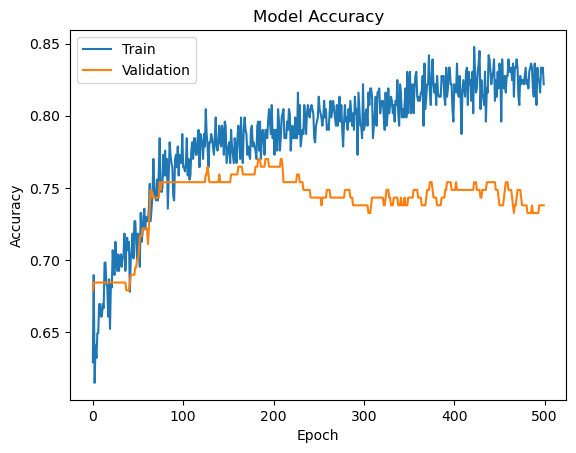

Validation accuracy of the best model: 0.7700534462928772
Accept this model? (y/n):y
Model has been fit and implemented.


In [8]:
# Test and fit the logistic regression for the full dataset
pipe_on_full.train_neural(data_full)

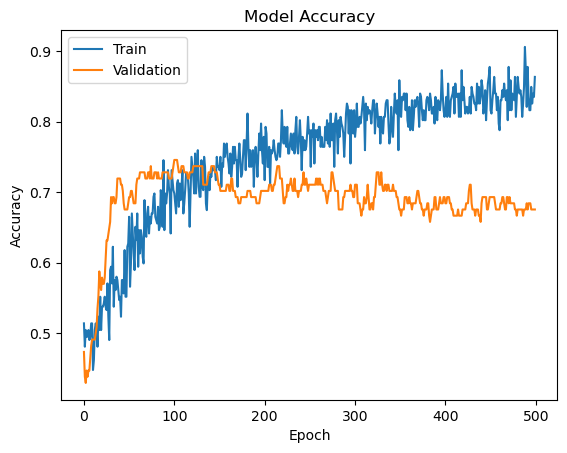

Validation accuracy of the best model: 0.7456140518188477
Accept this model? (y/n):y
Model has been fit and implemented.


In [9]:
# Test and fit the logistic regression for the full dataset
pipe_on_even.train_neural(data_even)

In [ ]:
# Check predictions for all four methods

In [10]:
pipe_on_full.predict(data_full)

Accuracy (overall): 77.76%
Accuracy (y=0): 49.08%
Accuracy (y=1): 90.32%


array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0.

In [11]:
pipe_on_full.predict(data_full,neural=True)

17/17 [==============================] - 0s 3ms/step
Accuracy (overall): 78.5%
Accuracy (y=0): 49.08%
Accuracy (y=1): 91.4%


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [12]:
pipe_on_even.predict(data_full)

Accuracy (overall): 76.07%
Accuracy (y=0): 57.67%
Accuracy (y=1): 84.14%


array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [13]:
pipe_on_even.predict(data_full,neural=True)

17/17 [==============================] - 0s 2ms/step
Accuracy (overall): 75.7%
Accuracy (y=0): 63.8%
Accuracy (y=1): 80.91%


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [14]:
# Store both the models
pipe_on_full.save('PipeOnFull')
pipe_on_even.save('PipeOnEven')

In [4]:
pipe_on_full = PredictionPipeline()
pipe_on_even = PredictionPipeline()

In [6]:
pipe_on_full.load('PipeOnFull')
pipe_on_even.load('PipeOnEven')

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.0.2. This might lead to b